In [1]:
# Run `jupyter notebook` in the braidpool/tests directory, or add the path to the tests/ directory here
#sys.path.append('../braidpool/tests/') 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]
import braid
from simulator import *

In [11]:
# A larger network or lower difficulty makes thicker braids
# Re-run this block to generate a different braid.
n = Network(50, target=2**240-1, hashrate=800000)
n.simulate(nbeads=30, mine=False) #  use `mine=False` if ${\rm target} < 2^{249}-1$ or so, for the same number of beads.

b = n.nodes[0].braid
# Extract the `parents` dict as integers (hashes) instead of instances of the <Bead> object
hashed_parents = {int(k): set(map(int, v)) for k,v in dict(b).items()}
# Remap integers (hashes) in the parents array to sequential integers for display purposes
parents = braid.number_beads(hashed_parents)
children = braid.reverse(parents)
work = braid.descendant_work(parents)
hwpath = braid.highest_work_path(parents, children, work=work)
cohorts = [set(map(int, c)) for c in b.cohorts]
print(f"Generated braid: {len(b.beads)} beads with {len(cohorts)} cohorts, {len(b.tips)} tips, and {len(hwpath)} beads in the highest work path.")

# Starting network with genesis bead 1e1567e6 at time          0.0
Generated braid: 30 beads with 13 cohorts, 2 tips, and 19 beads in the highest work path.


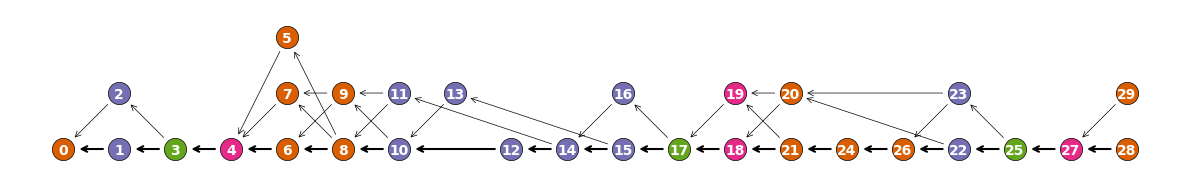

In [12]:
# The `layout()` function could use some work. It leaves some extra space and sometimes draws arrows over beads.
# If you want to work on it, I'd love to have beads place both above and below the highest work path, in order 
# of decreasing work as you move away from the highest work path vertically.
b.plot()